In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [8]:
df = pd.read_csv("./train.csv")

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
labels = pd.get_dummies(df.pop("label")).values

In [11]:
df_train = df.values.reshape(-1,28,28,1)

In [108]:
model = Sequential()
model.add(Conv2D(32,3,activation="relu",padding="same",input_shape=(28,28,1,),name="conv"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [109]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [110]:
model.fit(df_train,labels,batch_size=500,epochs=10)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 30us/sample - loss: 4.1211 - acc: 0.8550
Epoch 2/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.2303 - acc: 0.9692
Epoch 3/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0659 - acc: 0.9853
Epoch 4/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0203 - acc: 0.9938
Epoch 5/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0074 - acc: 0.9972
Epoch 6/10
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0031 - acc: 0.9990
Epoch 7/10
42000/42000 [==============================] - 1s 28us/sample - loss: 6.6306e-04 - acc: 1.0000
Epoch 8/10
42000/42000 [==============================] - 1s 28us/sample - loss: 2.3816e-04 - acc: 1.0000
Epoch 9/10
42000/42000 [==============================] - 1s 28us/sample - loss: 1.6934e-04 - acc: 1.0000
Epoch 10/10
42000/42000 [======================

In [111]:
a = model.get_layer("conv")

In [112]:
mode = Sequential()

In [113]:
mode.add(a)

In [114]:
convs = mode.predict(df_train[0:1])

In [115]:
imgs = convs.reshape(32,28,28)

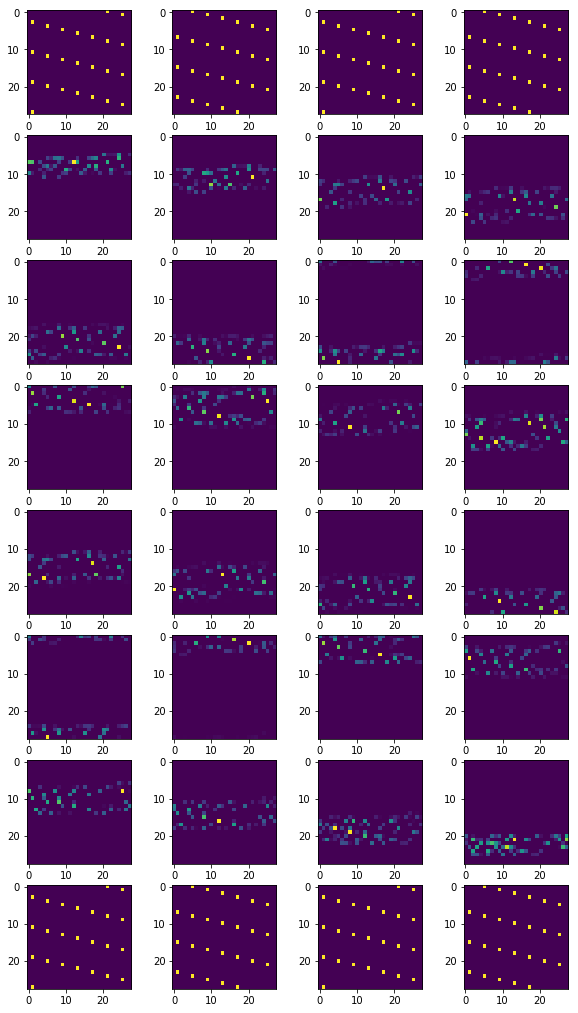

In [116]:
fig,axes = plt.subplots(8,4,figsize=(10,18))

for img,axs in zip(imgs.reshape(8,4,28,28),axes):
    for i,j in zip(img,axs):
        j.imshow(i)

In [117]:
w = a.get_weights()[0]

In [118]:
w = w.reshape(32,3,3)

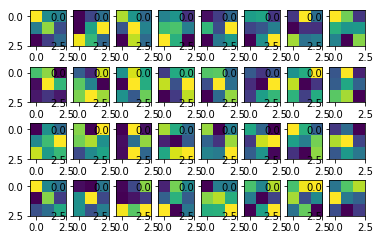

In [123]:
fig,axes = plt.subplots(4,8,figsize=(6,4))

for img,axs in zip(w.reshape(4,8,3,3),axes):
    for i,j in zip(img,axs):
        j.imshow(i)